In [1]:
######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Tian Jun(tianjun.cpp@gmail.com)                                #
# 2016 Artem Oboturov(oboturov@gmail.com)                             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

"""
Modified to test k-armed bandit.
Simulations and plots added.
- youyoungsong
"""

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np
from tqdm import trange

from Bandit import Bandit, simulate

In [2]:
def figure_2_1(num_action,k_bandit):
    for naction in num_action:
        plt_label = "N_action = " + str(num_action) + " k_bandit = " + str(k_bandit) 
        plt.violinplot(dataset=np.random.randn(naction,k_bandit)+np.random.randn(k_bandit))
    plt.xlabel("Action")
    plt.ylabel("Reward distribution")
    #plt.savefig('../images/figure_2_1.png')
    #plt.close()

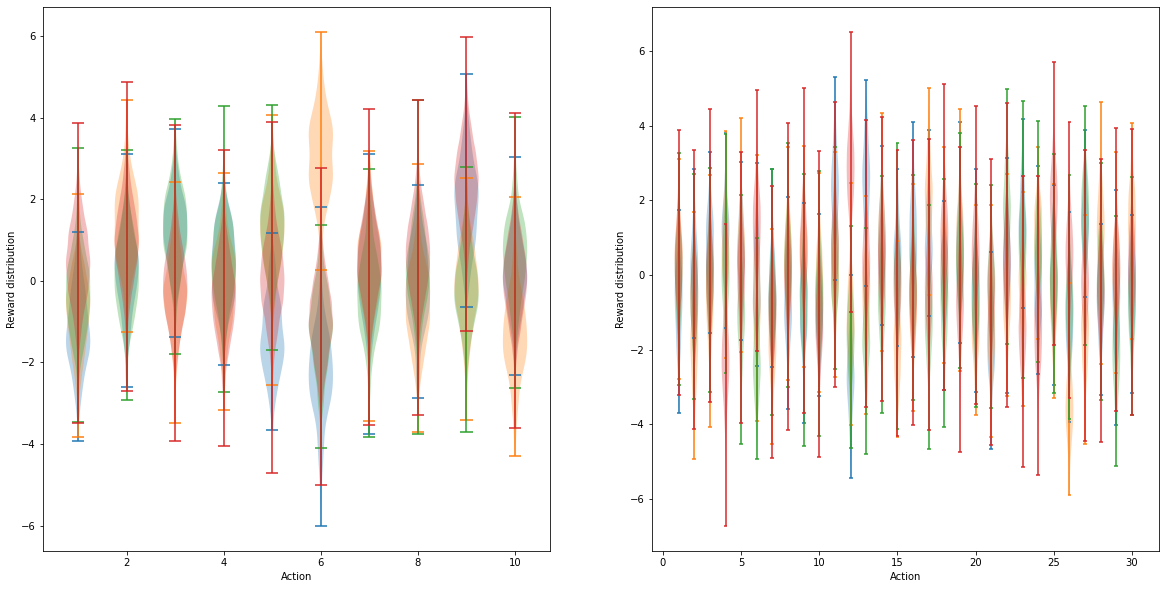

In [3]:
num_action = [200,500,1000,10000]

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
figure_2_1(num_action, 10)

plt.subplot(1,2,2)
figure_2_1(num_action, 30)

In [4]:
def figure_2_2(runs=2000, time=1000):
    epsilons = [0, 0.01, 0.1, 0.2, 0.5]
    bandits = [Bandit(epsilon=eps, sample_averages=True) for eps in epsilons]
    best_action_counts, rewards = simulate(runs, time, bandits)

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    for eps, rewards in zip(epsilons, rewards):
        plt.plot(rewards, label='$\epsilon = %.02f$' % (eps))
    plt.xlabel('steps')
    plt.ylabel('average reward')
    plt.legend()
    plt.rc('legend', fontsize=20)

    plt.subplot(1, 2, 2)
    for eps, counts in zip(epsilons, best_action_counts):
        plt.plot(counts, label='$\epsilon = %.02f$' % (eps))
    plt.xlabel('steps')
    plt.ylabel('% optimal action')
    plt.legend()
    plt.rc('legend', fontsize=20)

    #plt.savefig('../images/figure_2_2.png')
    #plt.close()

100%|██████████| 2000/2000 [00:33<00:00, 59.42it/s]


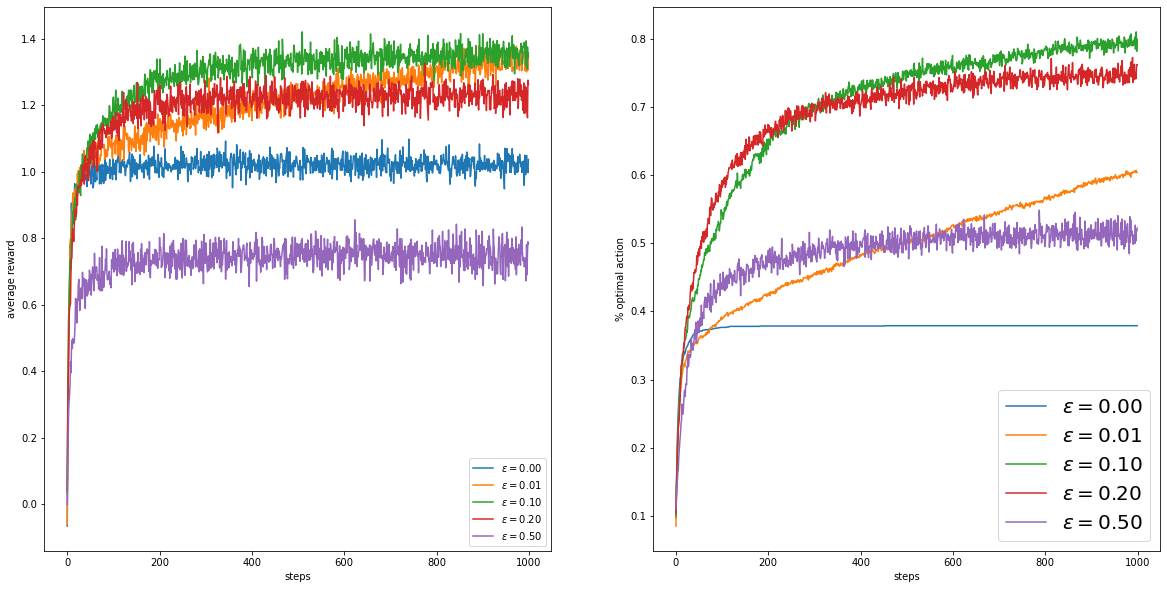

In [5]:
figure_2_2(2000,1000)

In [6]:
def figure_2_3(runs=2000, time=1000):
    bandits = []
    bandits.append(Bandit(epsilon=0, initial=0, step_size=0.1))
    bandits.append(Bandit(epsilon=0, initial=5, step_size=0.1)) # greedy
    bandits.append(Bandit(epsilon=0.1, initial=0, step_size=0.1)) # 0.1 ep-greedy
    bandits.append(Bandit(epsilon=0.1, initial=5, step_size=0.1))
    bandits.append(Bandit(epsilon=0.5, initial=0, step_size=0.1))
    bandits.append(Bandit(epsilon=0.5, initial=5, step_size=0.1))
    best_action_counts, rewards = simulate(runs, time, bandits)
    
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    plt.plot(rewards[0], label='$\epsilon = 0, q = 0$')
    plt.plot(rewards[1], label='$\epsilon = 0, q = 5$')
    plt.plot(rewards[2], label='$\epsilon = 0.1, q = 0$')
    plt.plot(rewards[3], label='$\epsilon = 0.1, q = 5$')
    plt.plot(rewards[4], label='$\epsilon = 0.5, q = 0$')
    plt.plot(rewards[5], label='$\epsilon = 0.5, q = 5$')
    plt.xlabel('steps')
    plt.ylabel('average reward')
    plt.legend()
    plt.rc('legend', fontsize=20)

    plt.subplot(1, 2, 2)
    plt.plot(best_action_counts[0], label='$\epsilon = 0, q = 0$')
    plt.plot(best_action_counts[1], label='$\epsilon = 0, q = 5$')
    plt.plot(best_action_counts[2], label='$\epsilon = 0.1, q = 0$')
    plt.plot(best_action_counts[3], label='$\epsilon = 0.1, q = 5$')
    plt.plot(best_action_counts[4], label='$\epsilon = 0.5, q = 0$')
    plt.plot(best_action_counts[5], label='$\epsilon = 0.5, q = 5$')
    plt.xlabel('steps')
    plt.ylabel('% optimal action')
    plt.legend()
    plt.rc('legend', fontsize=20)

    #plt.savefig('../images/figure_2_3.png')
    #plt.close()

100%|██████████| 2000/2000 [00:33<00:00, 59.15it/s]


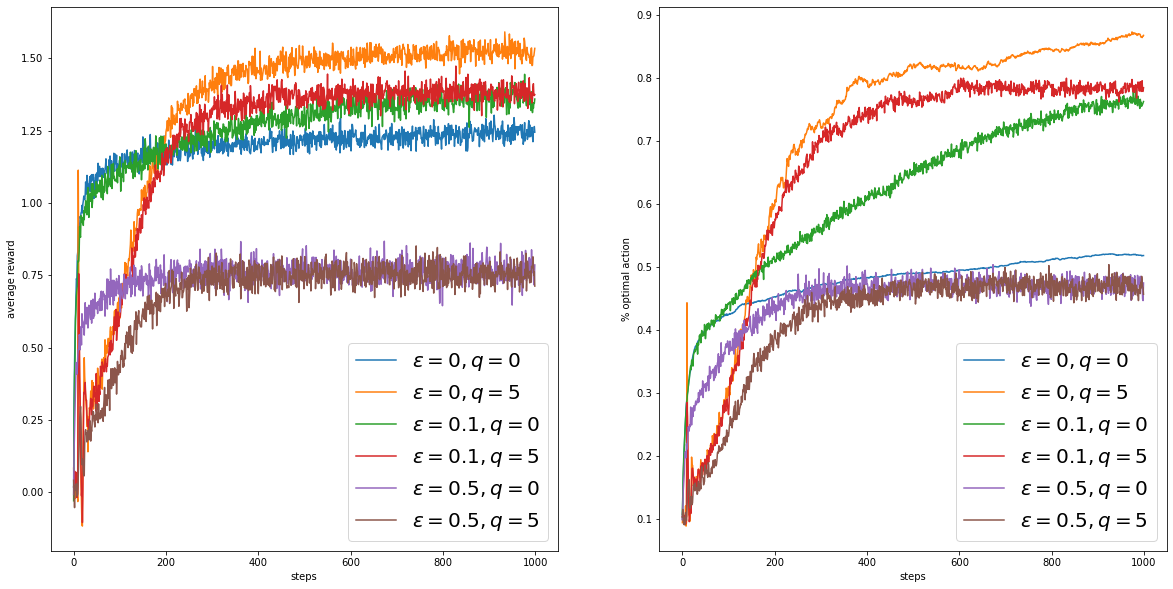

In [7]:
figure_2_3()

In [8]:
def figure_2_4(runs=2000, time=1000):
    bandits = []
    bandits.append(Bandit(epsilon=0, initial=5, step_size=0.1))
    bandits.append(Bandit(epsilon=0, sample_averages=True))
    bandits.append(Bandit(epsilon=0, UCB_param=2, sample_averages=True))
    bandits.append(Bandit(epsilon=0.1, initial=5, step_size=0.1))
    bandits.append(Bandit(epsilon=0.1, sample_averages=True))
    bandits.append(Bandit(epsilon=0.1, UCB_param=2, sample_averages=True))
    _, average_rewards = simulate(runs, time, bandits)
    
    plt.figure(figsize=(20, 10))
    
    plt.plot(average_rewards[0], label='$\epsilon = 0, q = 5$')
    plt.plot(average_rewards[1], label='$\epsilon = 0$, sample_avgs')
    plt.plot(average_rewards[2], label='$\epsilon = 0$, UCB $c = 2$')
    plt.plot(average_rewards[3], label='$\epsilon = 0.1, q = 5$')
    plt.plot(average_rewards[4], label='$\epsilon = 0.1$, sample_avgs')
    plt.plot(average_rewards[5], label='$\epsilon = 0.1$, UCB $c = 2$')
    plt.xlabel('Steps')
    plt.ylabel('Average reward')
    plt.legend()
    plt.rc('legend', fontsize=20)

    #plt.savefig('../images/figure_2_4.png')
    #plt.close()

100%|██████████| 2000/2000 [00:53<00:00, 37.42it/s]


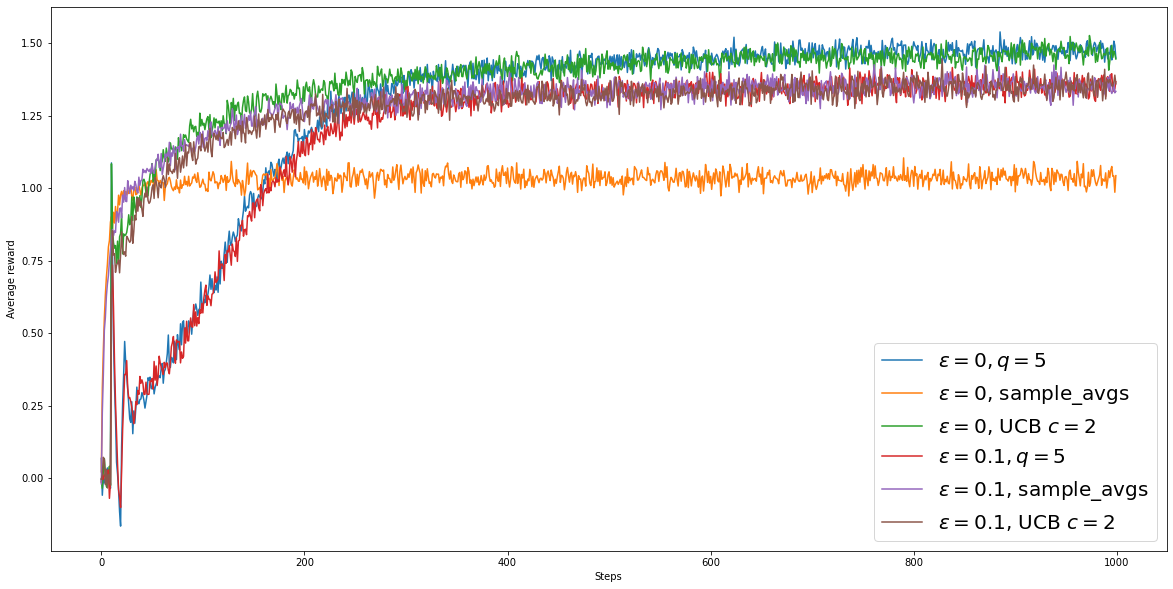

In [9]:
figure_2_4()

In [10]:
def figure_2_5(runs=2000, time=1000):
    bandits = []
    bandits.append(Bandit(gradient=True, step_size=0.1, gradient_baseline=True, true_reward=4))
    bandits.append(Bandit(gradient=True, step_size=0.1, gradient_baseline=False, true_reward=4))
    bandits.append(Bandit(gradient=True, step_size=0.4, gradient_baseline=True, true_reward=4))
    bandits.append(Bandit(gradient=True, step_size=0.4, gradient_baseline=False, true_reward=4))
    best_action_counts, _ = simulate(runs, time, bandits)
    labels = [r'$\alpha = 0.1$, with baseline',
              r'$\alpha = 0.1$, without baseline',
              r'$\alpha = 0.4$, with baseline',
              r'$\alpha = 0.4$, without baseline']

    plt.figure(figsize=(20, 10))
        
    for i in range(len(bandits)):
        plt.plot(best_action_counts[i], label=labels[i])
    plt.xlabel('Steps')
    plt.ylabel('% Optimal action')
    plt.legend()
    plt.rc('legend', fontsize=20)

    #plt.savefig('../images/figure_2_5.png')
    #plt.close()

100%|██████████| 2000/2000 [01:09<00:00, 28.72it/s]


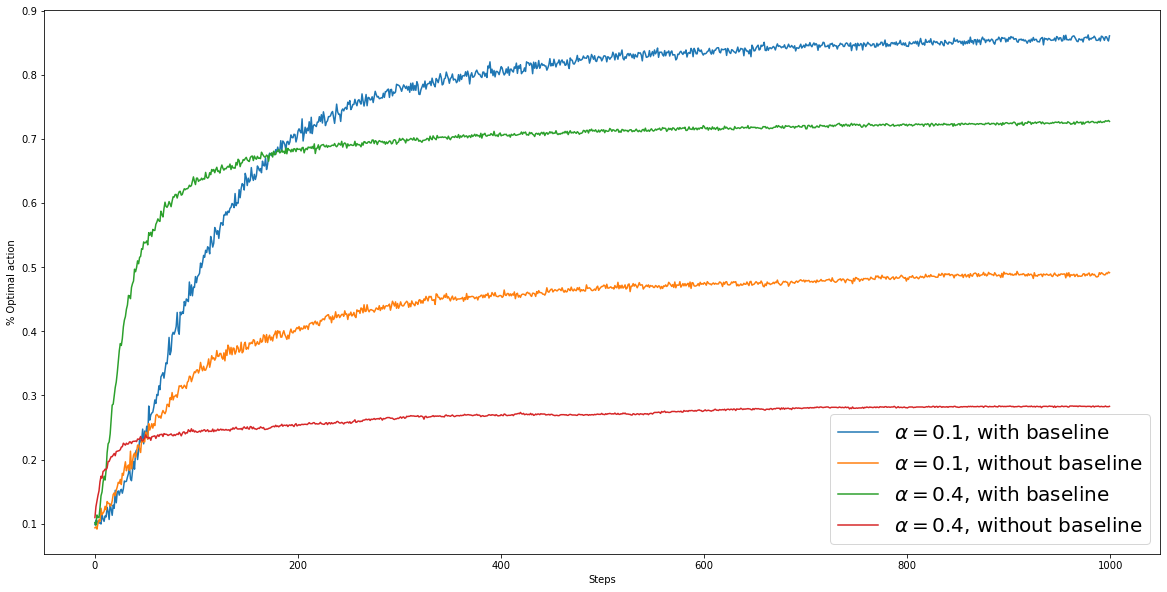

In [11]:
figure_2_5()

In [12]:
def figure_2_6(runs=2000, time=1000):
    labels = ['epsilon-greedy', 'gradient bandit',
              'UCB', 'optimistic initialization']
    generators = [lambda epsilon: Bandit(epsilon=epsilon, sample_averages=True),
                  lambda alpha: Bandit(gradient=True, step_size=alpha, gradient_baseline=True),
                  lambda coef: Bandit(epsilon=0, UCB_param=coef, sample_averages=True),
                  lambda initial: Bandit(epsilon=0, initial=initial, step_size=0.1)]
    parameters = [np.arange(-7, -1, dtype=float),
                  np.arange(-5, 2, dtype=float),
                  np.arange(-4, 3, dtype=float),
                  np.arange(-2, 3, dtype=float)]

    bandits = []
    for generator, parameter in zip(generators, parameters):
        for param in parameter:
            bandits.append(generator(pow(2, param)))

    _, average_rewards = simulate(runs, time, bandits)
    rewards = np.mean(average_rewards, axis=1)
    
    plt.figure(figsize=(20, 10))

    i = 0
    for label, parameter in zip(labels, parameters):
        l = len(parameter)
        plt.plot(pow(2, parameter), rewards[i:i+l], label=label)
        i += l
    plt.xlabel('Parameter($2^x$)')
    plt.ylabel('Average reward')
    plt.legend()
    plt.rc('legend', fontsize=20)

    #plt.savefig('../images/figure_2_6.png')
    #plt.close()

100%|██████████| 2000/2000 [00:40<00:00, 49.47it/s]


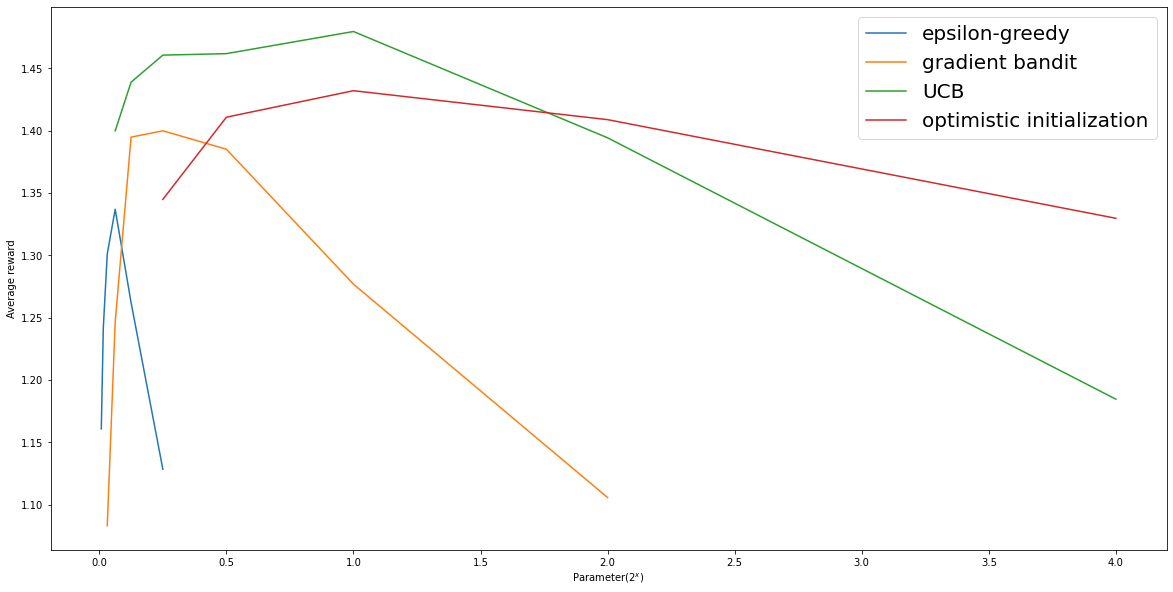

In [13]:
figure_2_6()